<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Практика. Применение статистических критериев»</b></h3>


# Импортирование библиотек

In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами

from scipy import stats # При работе со статистикой

import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns # Более продвинутая библиотека для визуализации

## T-test (Для двух выборок).

<div class="alert alert-info">
<b>Описание: </b>
Такой тест показывает, имеют ли две выборки данных разные средние значения (нас две разные выборки, а не одна!). Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние.
</div>

In [2]:
from scipy import stats  # Импортируем библиотеку
np.random.seed(40)  # Закрепим seed для воспроизводимости результата.


# Генерируем случайные выборки с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
A = stats.norm.rvs(loc=48, scale=10, size=1000)  
B = stats.norm.rvs(loc=50, scale=10, size=2000) 


t_value, p_value = stats.ttest_ind(A, B) # ttest_ind - Критерий Стьюдента (t-test)
t_value, p_value

(np.float64(-4.603969431926063), np.float64(4.317548864294915e-06))

<div class="alert alert-info">
    
**Мы получаем хорошее значение `p < 5%`, и, таким образом, мы отклоняем нулевую гипотезу, то есть - средние значения двух распределений различны и это различие статистически значимо**

In [3]:
A.mean(), B.mean()

(np.float64(48.46329427854953), np.float64(50.23424961080455))

**И действительно, если посмотреть на сгенерированные выборки с помощью гистограммы, то увидим их небольшой сдвиг между собой** 

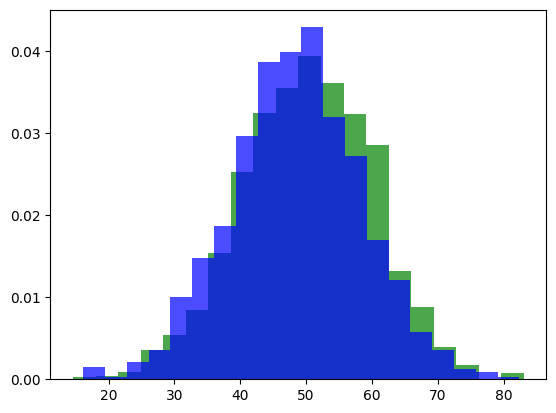

In [4]:
plt.hist(B, bins=20, density=True, alpha=0.7, color ='green'); #Выборка A
plt.hist(A, bins=20, density=True, alpha=0.7, color='blue');  #Выборка B

# Кейс - люди и тренировки

<div class="alert alert-info">
<b>Описание: </b>

Предположим, вас интересует оценка эффективности программы тренировок. Один из подходов, который вы можете рассмотреть, - это измерение веса группы людей до и после завершения программы тренировок и анализ различий с использованием критерия.
    
**Но какой критерий надо взять? Давайте разбираться!**

In [5]:
np.random.seed(42)
before = stats.norm.rvs(scale = 20, loc = 200, size = 1000)  # Генерируем эффективность тренировки до
after = before + stats.norm.rvs(scale = 15, loc = -.100, size = 1000) # Добавим к группе небольшое смещение - имитация эффекта

weight_df = pd.DataFrame({"weight_before": before,
                          "weight_after" : after,
                          "weight_change": after-before})

weight_df.describe() # Обратив внимание на средения значения до и после - заметит ли это отличие t-test?

,weight_before,weight_after,weight_change
count,1000.000000,1000.000000,1000.000000
mean,200.386641,201.349185,0.962544
std,19.584319,24.160417,14.961816
min,135.174653,132.629496,-44.205830
25%,187.048194,186.020797,-9.193625
50%,200.506012,200.763880,0.846157
75%,212.958878,216.031903,10.833233
max,277.054630,303.198281,47.796614


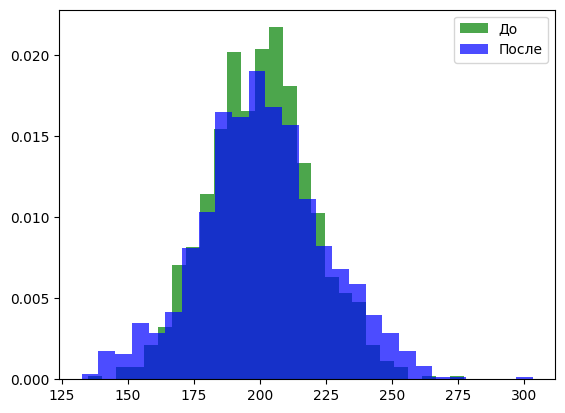

In [6]:
# Посмотрим на различия до и после 
plt.hist(weight_df['weight_before'], bins=27, density=True, alpha=0.7, color ='green', label='До'); #Выборка A
plt.hist(weight_df['weight_after'], bins=27, density=True, alpha=0.7, color='blue', label='После');  #Выборка B
plt.legend(labels=['До','После']);

## Критерий Стьюдента

In [7]:
t_value, p_value = stats.ttest_ind(weight_df['weight_before'], weight_df['weight_after'])

print('Статистики=%.3f, p=%.3f' % (t_value, p_value))

alpha = 0.05
if p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Статистики=-0.979, p=0.328
Одинаковые распределения (не отвергаем H0)


<div class="alert alert-warning">
    
    
<b>Заметим!: </b>

Критерий стюдента для двух выборок не заметил никаких различий. Хотя они точно есть, ведь мы задали их вручную.

Давайте попробуем применить критерий Уилкоксона, который учитывает зависимость групп и способен заметить различия для одной и той же группы в разные моменты времени

## Критерий Уилкоксона

In [8]:
import scipy.stats as stats
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test

#Выполняем тест Уилкоксона

t_value, p_value = wilcoxon(weight_df['weight_before'], weight_df['weight_after'])

print('Статистики=%.3f, p=%.3f' % (t_value, p_value))
 
alpha = 0.05
if p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Статистики=231331.000, p=0.038
Разные распределения (отвергаем H0)


<div class="alert alert-success">

Отлично! Верно выбранные критерий все-же заметил различия, которые мы заложили в данные. В зависимых группах изменения могут быть незаметнне, поэтому стоит ипользовать критерии, которые умеют делать поправку на зависимость. 

# Кейс - люди и зарплаты

<div class="alert alert-info">
<b>Описание: </b>

Предположим, вас интересует эффективности увеличения зарплат людей в разные моменты времени. Возьмем тот же подход, который мы рассмотрели ранее, - это измерение зарплат группы людей до и после нескольких лет и анализ различий с использованием критерия.
    
**Но опять же, какой критерий надо взять? Давайте разбираться!**

In [9]:
np.random.seed(42)

before = np.random.exponential(scale=100, size=1000)  # Генерируем зарплаты сотрудников до
after = before + np.random.exponential(scale=4.5, size=1000) # Добавим к группе небольшое смещение - имитация эффекта

weight_df = pd.DataFrame({"weight_before": before,
                          "weight_after" : after,
                          "weight_change": after-before})


weight_df.describe() #Обратив внимание на средения значения до и после - заметит ли это отличие t-test?

,weight_before,weight_after,weight_change
count,1000.000000,1000.000000,1000.000000
mean,97.250595,101.908606,4.658012
std,97.250989,97.457879,4.713898
min,0.464278,0.747264,0.014506
25%,26.915653,31.324979,1.241331
50%,68.678262,72.989144,3.291008
75%,136.383021,140.992556,6.430756
max,817.244560,821.485651,33.487753


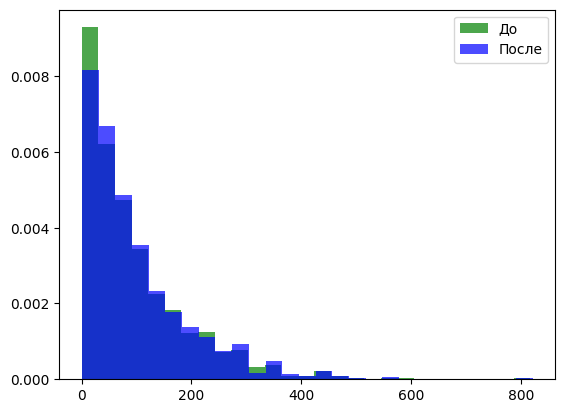

In [10]:
# Посмотрим на различия до и после 
plt.hist(weight_df['weight_before'], bins=27, density=True, alpha=0.7, color ='green', label='До'); #Выборка A
plt.hist(weight_df['weight_after'], bins=27, density=True, alpha=0.7, color='blue', label='После');  #Выборка B
plt.legend(labels=['До','После']);

<div class="alert alert-warning">
    
**Заметим**, что теперь распределение у нас ненормальное! И это значит, критерий Стьюдента может дать нам некорректные результаты.

In [11]:
t_value, p_value = stats.ttest_ind(weight_df['weight_before'], weight_df['weight_after'])

print('Статистики=%.3f, p=%.3f' % (t_value, p_value))

alpha = 0.05
if p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Статистики=-1.070, p=0.285
Одинаковые распределения (не отвергаем H0)


<div class="alert alert-info">
<b>Заметим!: </b>

Критерий стюдента для двух выборок не заметил никаких различий. Хотя они точно есть, ведь мы задали их вручную.

Давайте попробуем применить критерий Манна-Уитни, которому не важно распределение в данных и он способен справиться даже с таким.

In [12]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu # Импортируем нужный ранговый критерий из пакета scipy

#Выполняем тест Манна-Уитни

t_value, p_value = mannwhitneyu(weight_df['weight_before'], weight_df['weight_after'])
 
print('Статистики=%.3f, p=%.3f' % (t_value, p_value))
 
alpha = 0.05
if p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Статистики=476722.000, p=0.071
Одинаковые распределения (не отвергаем H0)


<div class="alert alert-success">

**Отлично!** Верно выбранные критерий все-же заметил различия, которые мы заложили в данные. Мы говорили в лекции, что надо обращать внимании на то, какое у вас распределение в данных, в противном случае, ваши выводы могут стать недоставерными. 
    Удобство ранговых критериев как раз в том, что им неважно какое у вас распределение (это непараметрические критерии)

# Выводы:

- Критерии дают возможность доказать различия между тестовой и контрольной группами
- Важно понимать, зависимы у вас группы или нет
- Полезно обращать внимание на то, какой распределение в ваших данных. 


В Следующих практиках, мы научимся работать с ненормальными распределениями!


 